In [1]:
import os, sys
sys.path.insert(0, os.path.dirname(os.getcwd()))

In [2]:
import optuna
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from kennard_stone import train_test_split
import pandas as pd
from models import Objective
from tools import get_learning_curve

Using TensorFlow backend.


In [3]:
SEED = 334

In [4]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.Series(boston.target, name = 'PRICE')

In [5]:
rf = RandomForestRegressor(n_jobs = -1, random_state = SEED)

In [6]:
objective = Objective(rf, X, y, scoring = 'neg_root_mean_squared_error', n_jobs = -1, random_state = SEED)

In [7]:
sampler = optuna.samplers.TPESampler(seed = SEED)
study = optuna.create_study(direction = 'maximize', sampler = sampler)
study.optimize(objective, n_trials = 100, n_jobs = -1)

[I 2021-02-07 21:21:41,196] A new study created in memory with name: no-name-99443a38-f956-454e-b295-ff4ac6259dcb
[I 2021-02-07 21:21:49,383] Trial 7 finished with value: -4.4708517824922325 and parameters: {'min_samples_split': 2, 'max_depth': 91, 'n_estimators': 109}. Best is trial 7 with value: -4.4708517824922325.
[I 2021-02-07 21:21:50,053] Trial 5 finished with value: -4.488562640306523 and parameters: {'min_samples_split': 9, 'max_depth': 36, 'n_estimators': 166}. Best is trial 7 with value: -4.4708517824922325.
[I 2021-02-07 21:21:50,578] Trial 6 finished with value: -4.502977405182561 and parameters: {'min_samples_split': 12, 'max_depth': 13, 'n_estimators': 188}. Best is trial 7 with value: -4.4708517824922325.
[I 2021-02-07 21:21:53,054] Trial 8 finished with value: -4.495019023284943 and parameters: {'min_samples_split': 5, 'max_depth': 30, 'n_estimators': 107}. Best is trial 7 with value: -4.4708517824922325.
[I 2021-02-07 21:21:53,483] Trial 3 finished with value: -4.4927

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Trials', ylabel='Objective Values'>)

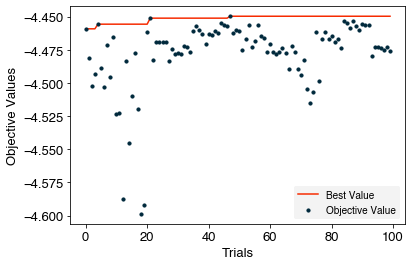

In [8]:
get_learning_curve(study)